# part I

Since Silhouette coefficient is blind to the "groud truth" label, so it is possible that when clsuter numbers are different to the groud truth it has higher Silhouette. It might also make us have a second thoughts maybe the "actual" clusters number should be different as what the ground truth label numbers. 

# Part II

In [32]:
# laod data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
# sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [33]:
heartdisease_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# 1
#### Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. Assess the consistency of the solutions using visualization. Which one does seem to be the best one?

In [34]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)



In [35]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_pca = PCA(n_components=2).fit_transform(X_std)

from sklearn.model_selection import train_test_split

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=24)



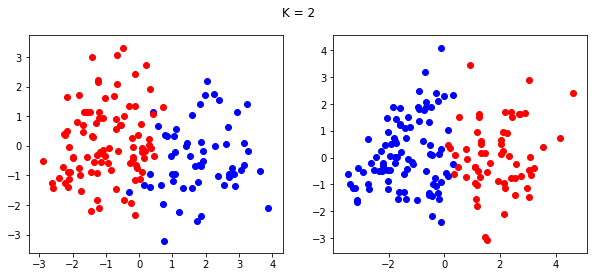

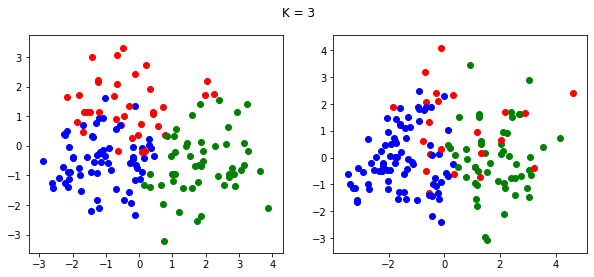

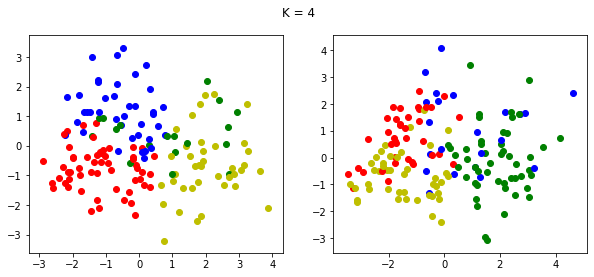

In [36]:
for n_cluster in np.arange(2, 5):
    # Defining the k-means
    kmeans_cluster = KMeans(n_clusters=n_cluster, random_state=123)

    # Fit model
#     %timeit 
    kmeans_cluster.fit(X_half1)
    y_pred_half1 = kmeans_cluster.predict(X_half1)
    
    kmeans_cluster.fit(X_half2)
    y_pred_half2 = kmeans_cluster.predict(X_half2)
    

    
    plt.figure(figsize=(10,4))
    colours = 'rbgyk'
    plt.subplot(1, 2, 1)
    for i in range(X_pcahalf1.shape[0]):
        plt.scatter(X_pcahalf1[i, 0], X_pcahalf1[i, 1], color=colours[y_pred_half1[i]])
    plt.subplot(1, 2, 2)
    for i in range(X_pcahalf2.shape[0]):
        plt.scatter(X_pcahalf2[i, 0], X_pcahalf2[i, 1], color=colours[y_pred_half2[i]])
    plt.suptitle('K = {}'.format(n_cluster))

#     plt.xticks([])
#     plt.yticks([])
#     plt.axis('off')
    plt.show()

According to the visulization, when K=2 and K=3, the clustering results are consistent. But when K=4, the result is not consistent.

# 2
Apply k-means on the whole dataset by setting k is equal two, three and four and get ARI score for each of them. Which model is the best?

In [37]:
from sklearn import metrics
# X_std
# y 


for n_cluster in [2,3,4]:
    # Defining the k-means
    kmeans_cluster = KMeans(n_clusters=n_cluster, random_state=123)


    kmeans_cluster.fit(X_std)
    full_pred = kmeans_cluster.predict(X_std)
    

    
    print("K = {}, ARI = {}".format(n_cluster, metrics.adjusted_rand_score(y, full_pred)))
    
   

    plt.show()

K = 2, ARI = 0.4380857727169879
K = 3, ARI = 0.28083523239878205
K = 4, ARI = 0.18990948475474176


According to the ARI, k=2 has the highest score. Which is not supprising since it tries to match the "ground truth"

# 3.
Apply k-means on the whole dataset by setting k is equal two, three and four and get silhouette coefficient for each of them. Which model is the best?

In [38]:
from sklearn import metrics
# X_std
# y 


for n_cluster in np.arange(2, 5):
    # Defining the k-means
    kmeans_cluster = KMeans(n_clusters=n_cluster, random_state=123)


    kmeans_cluster.fit(X_std)
    full_pred = kmeans_cluster.predict(X_std)
    

    
    print("K = {}, silhouette coefficient = {}".format(n_cluster, metrics.silhouette_score(X_std, full_pred, metric='euclidean')))
    
   



K = 2, silhouette coefficient = 0.17530682286260937
K = 3, silhouette coefficient = 0.12944781840210876
K = 4, silhouette coefficient = 0.13241797252962323


According to the silhouette coefficient, k=2 has the highest score